In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from plotly.subplots import make_subplots
import datetime as dt
from datetime import timedelta
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [2]:
data=pd.read_csv("../data/BNB.csv")
data

,DateTime,BNBL
0,2020-04-23 06:34:02,28
1,2020-04-23 09:34:02,28
2,2020-04-24 06:34:01,28
3,2020-04-24 09:34:02,28
4,2020-04-27 06:33:57,28
...,...,...
2496,2022-07-14 03:55:56,33
2497,2022-07-14 04:55:53,33
2498,2022-07-14 05:55:54,33
2499,2022-07-14 07:55:52,33


In [3]:
#Changing datetime to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime']).dt.date

#renaming the columns
data.rename(columns = {'DateTime':'date','BNBL':'price'}, inplace = True)
data['date'] = pd.to_datetime(data['date'],format = "%Y-%m-%d")
data

,date,price
0,2020-04-23,28
1,2020-04-23,28
2,2020-04-24,28
3,2020-04-24,28
4,2020-04-27,28
...,...,...
2496,2022-07-14,33
2497,2022-07-14,33
2498,2022-07-14,33
2499,2022-07-14,33


In [4]:
data = data.groupby('date').mean()
data.sort_index(inplace=True)
data

,price
date,
2020-04-23,28.0
2020-04-24,28.0
2020-04-27,28.0
2020-04-28,28.0
2020-04-29,28.0
...,...
2022-07-08,33.0
2022-07-11,33.0
2022-07-12,33.0


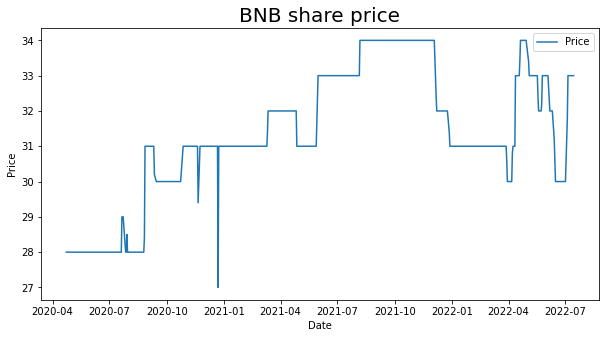

In [5]:
plt.figure(figsize=(10,5))
plt.plot(data['price'],label='Price')
plt.title('BNB share price', fontsize=20)
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposed = seasonal_decompose(data['price'], model ='additive',period=1)

In [7]:
trend = decomposed.trend
seasonal = decomposed.seasonal 
residual = decomposed.resid

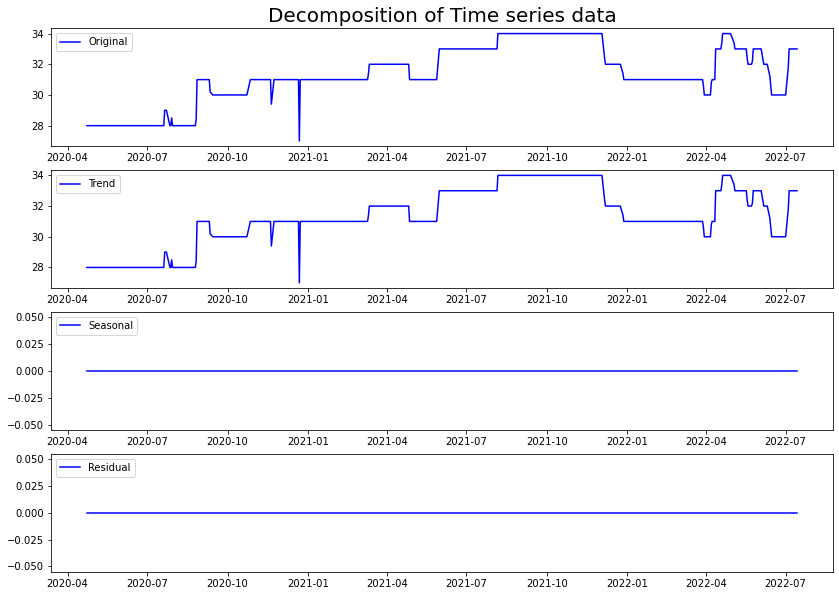

In [8]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.title('Decomposition of Time series data', fontsize=20)
plt.plot(data['price'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='blue')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual', color='blue')
plt.legend(loc='upper left')
plt.show()

In [9]:
from pmdarima.arima import auto_arima

In [10]:
sarima_model = auto_arima(data['price'], start_p = 1, d=2, start_q = 1, 
                          max_p = 5, max_q = 5, max_d=2, m = 12, 
                          start_P = 0, D=2, start_Q=0, max_P=5, max_D=2, max_Q=5,
                          seasonal = True, 
                          trace = True, 
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True, n_fits=50)   

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,2,0)[12]             : AIC=inf, Time=0.59 sec
 ARIMA(0,2,0)(0,2,0)[12]             : AIC=1811.846, Time=0.08 sec
 ARIMA(1,2,0)(1,2,0)[12]             : AIC=1289.558, Time=0.24 sec
 ARIMA(0,2,1)(0,2,1)[12]             : AIC=inf, Time=1.56 sec
 ARIMA(1,2,0)(0,2,0)[12]             : AIC=1591.723, Time=0.08 sec
 ARIMA(1,2,0)(2,2,0)[12]             : AIC=1152.248, Time=0.54 sec
 ARIMA(1,2,0)(3,2,0)[12]             : AIC=1067.755, Time=1.33 sec
 ARIMA(1,2,0)(4,2,0)[12]             : AIC=1010.199, Time=2.32 sec
 ARIMA(1,2,0)(5,2,0)[12]             : AIC=966.451, Time=3.61 sec
 ARIMA(1,2,0)(5,2,1)[12]             : AIC=inf, Time=24.10 sec
 ARIMA(1,2,0)(4,2,1)[12]             : AIC=inf, Time=13.61 sec
 ARIMA(0,2,0)(5,2,0)[12]             : AIC=1184.146, Time=2.57 sec
 ARIMA(2,2,0)(5,2,0)[12]             : AIC=899.257, Time=4.35 sec
 ARIMA(2,2,0)(4,2,0)[12]             : AIC=946.882, Time=3.09 sec
 ARIMA(2,2,0)(5,2,1)[12]             : A

In [11]:
print(sarima_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  547
Model:             SARIMAX(5, 2, 0)x(5, 2, 0, 12)   Log Likelihood                -393.453
Date:                            Fri, 19 Aug 2022   AIC                            808.906
Time:                                    10:22:12   BIC                            855.719
Sample:                                         0   HQIC                           827.243
                                            - 547                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0109      0.020    -50.788      0.000      -1.050      -0.972
ar.L2         -0.8156      0.044   

In [45]:
size = int(len(data) * 0.65)
X_train, X_test = data[0:size], data[size:len(data)]

In [13]:
X_train

,price
date,
2020-04-23,28.0
2020-04-24,28.0
2020-04-27,28.0
2020-04-28,28.0
2020-04-29,28.0
...,...
2021-09-22,34.0
2021-09-23,34.0
2021-09-24,34.0


In [14]:
X_test

,price
date,
2021-09-29,34.0
2021-09-30,34.0
2021-10-01,34.0
2021-10-04,34.0
2021-10-05,34.0
...,...
2022-07-08,33.0
2022-07-11,33.0
2022-07-12,33.0


In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 

In [16]:
model = SARIMAX(X_train['price'], order = (5, 2, 0), seasonal_order =(0, 0, 0, 0)) 

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [17]:
result = model.fit() 
print(result.summary()) 

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  355
Model:               SARIMAX(5, 2, 0)   Log Likelihood                -184.607
Date:                Fri, 19 Aug 2022   AIC                            381.213
Time:                        10:22:12   BIC                            404.412
Sample:                             0   HQIC                           390.444
                                - 355                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1510      0.013    -87.478      0.000      -1.177      -1.125
ar.L2         -1.0083      0.037    -27.074      0.000      -1.081      -0.935
ar.L3         -0.7633      0.058    -13.261      0.0

In [18]:
start_index = 0
end_index = len(X_train)-1
train_prediction = result.predict(start_index, end_index,typ='levels',dynamic = False) 
#train_prediction = result.predict(X_train) 

In [19]:
print(train_prediction)

date
2020-04-23     0.000000
2020-04-24    41.999999
2020-04-27    28.000007
2020-04-28    28.000003
2020-04-29    28.000002
                ...    
2021-09-22    34.000000
2021-09-23    34.000000
2021-09-24    34.000000
2021-09-27    34.000000
2021-09-28    34.000000
Name: predicted_mean, Length: 355, dtype: float64


In [20]:
start_index = len(X_train)
end_index = len(data)-1
test_prediction = result.predict(start_index, end_index,typ='levels',dynamic = False)

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [21]:
test_prediction

355    34.0
356    34.0
357    34.0
358    34.0
359    34.0
       ... 
542    34.0
543    34.0
544    34.0
545    34.0
546    34.0
Name: predicted_mean, Length: 192, dtype: float64

In [22]:
test_prediction = test_prediction.to_frame()
test_prediction

,predicted_mean
355,34.0
356,34.0
357,34.0
358,34.0
359,34.0
...,...
542,34.0
543,34.0
544,34.0
545,34.0


In [23]:
test_prediction['date'] = pd.date_range(start='2021-09-29', periods=len(X_test), freq='D')
test_prediction

,predicted_mean,date
355,34.0,2021-09-29
356,34.0,2021-09-30
357,34.0,2021-10-01
358,34.0,2021-10-02
359,34.0,2021-10-03
...,...,...
542,34.0,2022-04-04
543,34.0,2022-04-05
544,34.0,2022-04-06
545,34.0,2022-04-07


In [24]:
test_prediction = test_prediction.set_index('date')
test_prediction

,predicted_mean
date,
2021-09-29,34.0
2021-09-30,34.0
2021-10-01,34.0
2021-10-02,34.0
2021-10-03,34.0
...,...
2022-04-04,34.0
2022-04-05,34.0
2022-04-06,34.0


In [25]:
test_prediction = test_prediction.rename(columns = {'predicted_mean':'predicted_price'})
test_prediction

,predicted_price
date,
2021-09-29,34.0
2021-09-30,34.0
2021-10-01,34.0
2021-10-02,34.0
2021-10-03,34.0
...,...
2022-04-04,34.0
2022-04-05,34.0
2022-04-06,34.0


In [26]:
test_prediction = pd.Series(test_prediction['predicted_price'], index=test_prediction.index)
test_prediction

date
2021-09-29    34.0
2021-09-30    34.0
2021-10-01    34.0
2021-10-02    34.0
2021-10-03    34.0
              ... 
2022-04-04    34.0
2022-04-05    34.0
2022-04-06    34.0
2022-04-07    34.0
2022-04-08    34.0
Name: predicted_price, Length: 192, dtype: float64

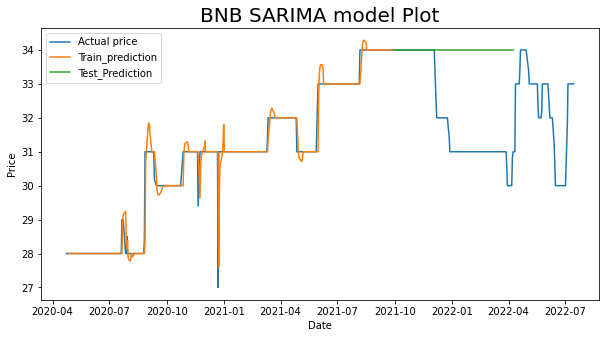

In [27]:
plt.figure(figsize=(10,5))
plt.plot(data['price'],label='Actual price')
plt.plot(train_prediction.iloc[2:],label='Train_prediction')
plt.plot(test_prediction, label='Test_Prediction')
plt.title('BNB SARIMA model Plot', fontsize=20)
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()

In [28]:
import math
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from math import sqrt
RMSE=math.sqrt(mean_squared_error(X_train,train_prediction))
MAE=mean_absolute_error(X_train,train_prediction)
R2=r2_score(X_train,train_prediction)
print("RMSE:", RMSE)
print("MAE:", MAE)
print("R-Squared:", R2)

RMSE: 1.7104003962776273
MAE: 0.23523607887618975
R-Squared: 0.22946437385506757


In [29]:
RMSE=math.sqrt(mean_squared_error(X_test,test_prediction))
MAE=mean_absolute_error(X_test,test_prediction)
R2=r2_score(X_test,test_prediction)
print("RMSE:", RMSE)
print("MAE:", MAE)
print("R-Squared:", R2)

RMSE: 2.2973263445434418
MAE: 1.8197916666666665
R-Squared: -1.684399537067443


In [30]:
forecast = result.predict(start = len(data),  
                          end = (len(data)-1) + 30,  
                          typ = 'levels')

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [31]:
forecast

547    34.0
548    34.0
549    34.0
550    34.0
551    34.0
552    34.0
553    34.0
554    34.0
555    34.0
556    34.0
557    34.0
558    34.0
559    34.0
560    34.0
561    34.0
562    34.0
563    34.0
564    34.0
565    34.0
566    34.0
567    34.0
568    34.0
569    34.0
570    34.0
571    34.0
572    34.0
573    34.0
574    34.0
575    34.0
576    34.0
Name: predicted_mean, dtype: float64

In [32]:
forecast = forecast.to_frame()
forecast.head()

,predicted_mean
547,34.0
548,34.0
549,34.0
550,34.0
551,34.0


In [33]:
forecast['date'] = pd.date_range(start='2022-07-14', periods=30, freq='D')
forecast.head()

,predicted_mean,date
547,34.0,2022-07-14
548,34.0,2022-07-15
549,34.0,2022-07-16
550,34.0,2022-07-17
551,34.0,2022-07-18


In [34]:
forecast = forecast.set_index('date')
forecast.head()

,predicted_mean
date,
2022-07-14,34.0
2022-07-15,34.0
2022-07-16,34.0
2022-07-17,34.0
2022-07-18,34.0


In [35]:
forecast = forecast.rename(columns = {'predicted_mean':'predicted_price'})
forecast.head()

,predicted_price
date,
2022-07-14,34.0
2022-07-15,34.0
2022-07-16,34.0
2022-07-17,34.0
2022-07-18,34.0


In [36]:
forcast = pd.Series(forecast['predicted_price'], index=test_prediction.index)
forecast

,predicted_price
date,
2022-07-14,34.0
2022-07-15,34.0
2022-07-16,34.0
2022-07-17,34.0
2022-07-18,34.0
2022-07-19,34.0
2022-07-20,34.0
2022-07-21,34.0
2022-07-22,34.0


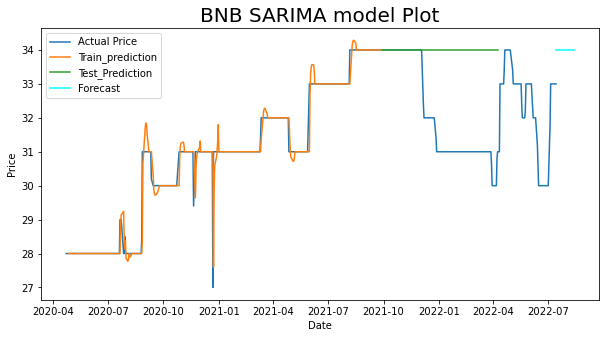

In [37]:
plt.figure(figsize=(10,5))
plt.plot(data['price'],label='Actual Price')
plt.plot(train_prediction.iloc[2:],label='Train_prediction')
plt.plot(test_prediction, label='Test_Prediction')
plt.plot(forecast, label='Forecast', color='cyan')
plt.title('BNB SARIMA model Plot', fontsize=20)
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()

In [38]:
test_prediction

date
2021-09-29    34.0
2021-09-30    34.0
2021-10-01    34.0
2021-10-02    34.0
2021-10-03    34.0
              ... 
2022-04-04    34.0
2022-04-05    34.0
2022-04-06    34.0
2022-04-07    34.0
2022-04-08    34.0
Name: predicted_price, Length: 192, dtype: float64

In [39]:
type(test_prediction)

pandas.core.series.Series

In [40]:
test_prediction = test_prediction.to_frame()
test_prediction

,predicted_price
date,
2021-09-29,34.0
2021-09-30,34.0
2021-10-01,34.0
2021-10-02,34.0
2021-10-03,34.0
...,...
2022-04-04,34.0
2022-04-05,34.0
2022-04-06,34.0


In [41]:
test_prediction = test_prediction.to_csv('predictedData/bnb_sarima_testPred.csv')

In [43]:
forecast.head()

,predicted_price
date,
2022-07-14,34.0
2022-07-15,34.0
2022-07-16,34.0
2022-07-17,34.0
2022-07-18,34.0


In [44]:
forecast = forecast.to_csv('predictedData/bnb_sarima_forecast.csv')

In [46]:
X_test

,price
date,
2021-09-29,34.0
2021-09-30,34.0
2021-10-01,34.0
2021-10-04,34.0
2021-10-05,34.0
...,...
2022-07-08,33.0
2022-07-11,33.0
2022-07-12,33.0


In [47]:
X_test = X_test.reset_index()

In [48]:
X_test

,date,price
0,2021-09-29,34.0
1,2021-09-30,34.0
2,2021-10-01,34.0
3,2021-10-04,34.0
4,2021-10-05,34.0
...,...,...
187,2022-07-08,33.0
188,2022-07-11,33.0
189,2022-07-12,33.0
190,2022-07-13,33.0


In [50]:
X_test = X_test.to_csv('predictedData/actualBNB.csv')